# 제주도 날씨 데이터를 활용한 관광객 수 예측 모델

## 1. 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# 제주 내국인 관광객 수 데이터(2015 ~2020)
df = pd.read_excel('jeju_tourist.xlsx')
df.head()

,구분연월,행태별 - 개별여행,행태별 - 부분패키지,행태별 - 패키지,목적별 - 레저스포츠,목적별 - 회의및업무,목적별 - 휴양및관람,목적별 - 친지방문,목적별 - 교육여행,목적별 - 기타방문
0,2015-01-01,624526,96124,72018,127063,75791,521304,55457,3621,9432
1,2015-02-01,595357,103768,22462,134718,72552,459032,43058,202,12025
2,2015-03-01,635832,110797,45085,143528,78294,490004,44581,20466,14841
3,2015-04-01,600794,221013,117518,146259,83467,623087,27927,44893,13662
4,2015-05-01,760163,134508,120668,179944,87166,628479,29779,71746,18225


In [6]:
# 월별 관광객 수: 형태별(개별여행), 형태별(부분 패키지), 형태별(패키지) 컬럼 값 병합
total = df.iloc[:,1] + df.iloc[:,2] + df.iloc[:,3]
total = pd.DataFrame(total, columns=['total'])
total.head()

,total
0,792668
1,721587
2,791714
3,939325
4,1015339


---

In [7]:
# 제주도 기상개황정보 데이터(2015 ~ 2020)
df2 = pd.read_excel('jeju_weather.xlsx')
df2.head()

,내용,평균기온 (℃),평균강수량 (mm),평균상대습도 (%),평균해면기압 (hPa),이슬점온도 (℃),평균운량 (1/10),일조시간 (hr),최심신적설 (cm),평균풍속 (m/s)
0,201501,7.4,82.4,66.0,1024.6,1.2,6.5,94.2,1.8,3.9
1,201502,7.3,35.5,64.0,1022.7,0.7,6.5,93.5,0.5,3.7
2,201503,10.4,80.7,64.0,1021.9,3.3,5.3,183.8,-,2.9
3,201504,15.1,147.9,71.0,1015.9,9.0,6.2,163.4,-,2.9
4,201505,18.8,150.0,68.0,1010.7,12.1,5.3,239.7,-,2.6


In [8]:
# index 초기화
df2 = df2.reset_index(drop=True)
df2

,내용,평균기온 (℃),평균강수량 (mm),평균상대습도 (%),평균해면기압 (hPa),이슬점온도 (℃),평균운량 (1/10),일조시간 (hr),최심신적설 (cm),평균풍속 (m/s)
0,201501,7.4,82.4,66.0,1024.6,1.2,6.5,94.2,1.8,3.9
1,201502,7.3,35.5,64.0,1022.7,0.7,6.5,93.5,0.5,3.7
2,201503,10.4,80.7,64.0,1021.9,3.3,5.3,183.8,-,2.9
3,201504,15.1,147.9,71.0,1015.9,9.0,6.2,163.4,-,2.9
4,201505,18.8,150.0,68.0,1010.7,12.1,5.3,239.7,-,2.6
...,...,...,...,...,...,...,...,...,...,...
67,202008,28.4,149.8,83.0,1009.4,24.9,5.9,211.3,-,2.4
68,202009,22.5,412.7,79.0,1011.3,18.3,6.7,149.5,-,2.6
69,202010,18.5,46.5,64.5,1019.7,11.3,5.2,198.7,-,2.3
70,202011,14.6,20.0,69.0,1024.3,8.6,5.4,152.8,-,2.2


In [9]:
# 데이터프레임 병합
jeju = pd.concat([df2, total], axis=1)
jeju.head()

,내용,평균기온 (℃),평균강수량 (mm),평균상대습도 (%),평균해면기압 (hPa),이슬점온도 (℃),평균운량 (1/10),일조시간 (hr),최심신적설 (cm),평균풍속 (m/s),total
0,201501,7.4,82.4,66.0,1024.6,1.2,6.5,94.2,1.8,3.9,792668
1,201502,7.3,35.5,64.0,1022.7,0.7,6.5,93.5,0.5,3.7,721587
2,201503,10.4,80.7,64.0,1021.9,3.3,5.3,183.8,-,2.9,791714
3,201504,15.1,147.9,71.0,1015.9,9.0,6.2,163.4,-,2.9,939325
4,201505,18.8,150.0,68.0,1010.7,12.1,5.3,239.7,-,2.6,1015339


In [10]:
# '최심신적설'은 결측값이 너무 많기에 존재하지 않으니 drop
jeju.drop(columns=['최심신적설 (cm)'], inplace=True)
jeju

,내용,평균기온 (℃),평균강수량 (mm),평균상대습도 (%),평균해면기압 (hPa),이슬점온도 (℃),평균운량 (1/10),일조시간 (hr),평균풍속 (m/s),total
0,201501,7.4,82.4,66.0,1024.6,1.2,6.5,94.2,3.9,792668
1,201502,7.3,35.5,64.0,1022.7,0.7,6.5,93.5,3.7,721587
2,201503,10.4,80.7,64.0,1021.9,3.3,5.3,183.8,2.9,791714
3,201504,15.1,147.9,71.0,1015.9,9.0,6.2,163.4,2.9,939325
4,201505,18.8,150.0,68.0,1010.7,12.1,5.3,239.7,2.6,1015339
...,...,...,...,...,...,...,...,...,...,...
67,202008,28.4,149.8,83.0,1009.4,24.9,5.9,211.3,2.4,1127097
68,202009,22.5,412.7,79.0,1011.3,18.3,6.7,149.5,2.6,726169
69,202010,18.5,46.5,64.5,1019.7,11.3,5.2,198.7,2.3,1072455
70,202011,14.6,20.0,69.0,1024.3,8.6,5.4,152.8,2.2,1138369


In [11]:
# heatmap시 깨지지 않도록 칼럼 이름 변경
jeju.columns = ['date', 'temperature(℃)', 'rain(mm)', 'humidity(%)', 'pressure(hPa)', 'dew_point(℃)', 'cloud(1/10)', 'daylight(hr)', 'windspeed(m/s)', 'total']
jeju.head()

,date,temperature(℃),rain(mm),humidity(%),pressure(hPa),dew_point(℃),cloud(1/10),daylight(hr),windspeed(m/s),total
0,201501,7.4,82.4,66.0,1024.6,1.2,6.5,94.2,3.9,792668
1,201502,7.3,35.5,64.0,1022.7,0.7,6.5,93.5,3.7,721587
2,201503,10.4,80.7,64.0,1021.9,3.3,5.3,183.8,2.9,791714
3,201504,15.1,147.9,71.0,1015.9,9.0,6.2,163.4,2.9,939325
4,201505,18.8,150.0,68.0,1010.7,12.1,5.3,239.7,2.6,1015339


In [12]:
# 칼럼 확인
jeju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            72 non-null     int64  
 1   temperature(℃)  72 non-null     float64
 2   rain(mm)        72 non-null     float64
 3   humidity(%)     72 non-null     float64
 4   pressure(hPa)   72 non-null     float64
 5   dew_point(℃)    72 non-null     float64
 6   cloud(1/10)     72 non-null     object 
 7   daylight(hr)    72 non-null     float64
 8   windspeed(m/s)  72 non-null     float64
 9   total           72 non-null     int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.8+ KB


- "평균운량 (1/10)" 컬럼에 -, 0으로 채워진 행이 많아 결측값 채우는 함수 필요
- 2015년, 2019년, 2020년 데이터는 있으므로 3년 각 월의 평균값으로 채워줄 예정

---

## 민선 전처리

In [13]:
# date 컬럼의 "월"만 month 컬럼에 저장

jeju["month"] = 0
for i in range(len(jeju)):
    jeju["month"][i] = jeju["date"][i] % 100
jeju

,date,temperature(℃),rain(mm),humidity(%),pressure(hPa),dew_point(℃),cloud(1/10),daylight(hr),windspeed(m/s),total,month
0,201501,7.4,82.4,66.0,1024.6,1.2,6.5,94.2,3.9,792668,1
1,201502,7.3,35.5,64.0,1022.7,0.7,6.5,93.5,3.7,721587,2
2,201503,10.4,80.7,64.0,1021.9,3.3,5.3,183.8,2.9,791714,3
3,201504,15.1,147.9,71.0,1015.9,9.0,6.2,163.4,2.9,939325,4
4,201505,18.8,150.0,68.0,1010.7,12.1,5.3,239.7,2.6,1015339,5
...,...,...,...,...,...,...,...,...,...,...,...
67,202008,28.4,149.8,83.0,1009.4,24.9,5.9,211.3,2.4,1127097,8
68,202009,22.5,412.7,79.0,1011.3,18.3,6.7,149.5,2.6,726169,9
69,202010,18.5,46.5,64.5,1019.7,11.3,5.2,198.7,2.3,1072455,10
70,202011,14.6,20.0,69.0,1024.3,8.6,5.4,152.8,2.2,1138369,11


In [14]:
jeju['month'][36:48]

36     1
37     2
38     3
39     4
40     5
41     6
42     7
43     8
44     9
45    10
46    11
47    12
Name: month, dtype: int64

In [15]:
# 최종 결측값 채우기 함수
def fill(column):
    # 평균 구하기
    meanList = [0 for i in range(12)]
    
    # '-'은 0으로 바꿔주기
    for i in range(len(jeju[column])):
        if jeju[column][i] == "-":
            jeju[column][i] = 0
        # sum을 리스트에 추가
        for j in range(12):
            if jeju["month"][i] == j+1:
                meanList[j] = meanList[j] + jeju[column][i]
    # mean 구하기
    meanList = [round(x/3, 1) for x in meanList]

  # 평균으로 채우기
    for i in range(len(jeju[column])):
        if jeju[column][i] == 0:
            for j in range(12):
                if jeju["month"][i] == j+1:
                    jeju[column][i] = meanList[j]

In [16]:
fill("cloud(1/10)")
jeju["cloud(1/10)"][13:60]

13    6.4
14    5.3
15    5.3
16    5.6
17    6.9
18    7.3
19    6.0
20    6.3
21    4.6
22    6.0
23    6.8
24    6.6
25    6.4
26    5.3
27    5.3
28    5.6
29    6.9
30    7.3
31    6.0
32    6.3
33    4.6
34    6.0
35    6.8
36    6.6
37    6.4
38    5.3
39    5.3
40    5.6
41    6.9
42    7.3
43    6.0
44    6.3
45    4.6
46    6.0
47    6.8
48    5.9
49    6.8
50    5.4
51    5.5
52    5.5
53    6.2
54    7.5
55    6.2
56    6.8
57    4.8
58      5
59    6.8
Name: cloud(1/10), dtype: object

## 시형 전처리

In [17]:
# 평균운량 결측치 채우기
for i in range(len(jeju['cloud(1/10)'])):
    if jeju['cloud(1/10)'][i] == '-':
        jeju['cloud(1/10)'][i] = 0
jeju = jeju.astype({'cloud(1/10)':'float'})

for j in range(12):
    sum=jeju['cloud(1/10)'][j]+jeju['cloud(1/10)'][j+48]+jeju['cloud(1/10)'][j+60]
    mean = round(sum/3,1)
    for k in range(1,4):
        jeju['cloud(1/10)'][j+(12*k)]=mean

In [18]:
jeju['cloud(1/10)'][13:60]

13    6.4
14    5.3
15    5.3
16    5.6
17    6.9
18    7.3
19    6.0
20    6.3
21    4.6
22    6.0
23    6.8
24    6.6
25    6.4
26    5.3
27    5.3
28    5.6
29    6.9
30    7.3
31    6.0
32    6.3
33    4.6
34    6.0
35    6.8
36    6.6
37    6.4
38    5.3
39    5.3
40    5.6
41    6.9
42    7.3
43    6.0
44    6.3
45    4.6
46    6.0
47    6.8
48    5.9
49    6.8
50    5.4
51    5.5
52    5.5
53    6.2
54    7.5
55    6.2
56    6.8
57    4.8
58    5.0
59    6.8
Name: cloud(1/10), dtype: float64

---

## 2. EDA

[heatmap 문법](https://dsbook.tistory.com/51)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

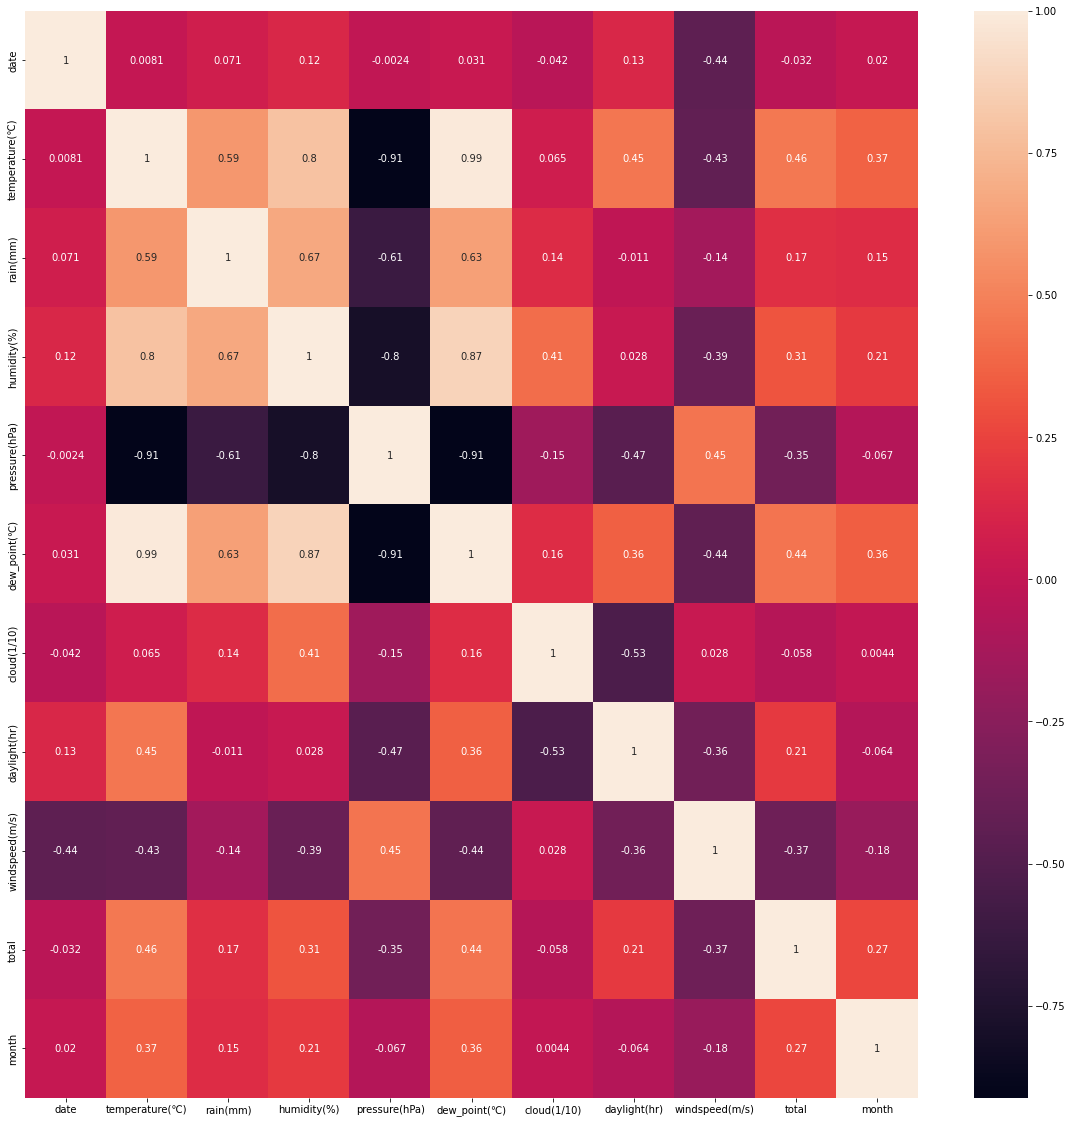

In [20]:
# 상관계수 plot 그리기
plt.figure(figsize=(20,20))
sns.heatmap(jeju.corr(), annot=True)

**r>0.8** : 강한 상관이 있다   
**0.6<r<0.8** : 상관이 있다  
**0.4<r<0.6** : 약한 상관이 있다  

*total과 (어느 정도) 상관이 있어 보이는 변수* :  
temperature, dew_point

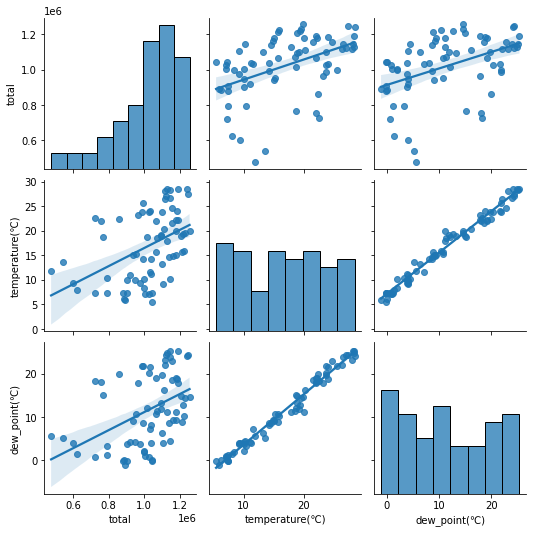

In [21]:
# pairplot으로 더 살펴보기
sns.pairplot(jeju[['total','temperature(℃)', 'dew_point(℃)']], kind='reg')
plt.show()

하지만, *temperature*과 *dew_point*로 놓고 봤을 때 **다중공선성** 문제가 의심됨     
때문에 독립변수를 *temperature* 하나만 갖고 **단순선형회귀**로 작업하는 게 나을 듯!

---

---

# 3. 모델링

## 3-1. 모델링_Linear

### 변수선택

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
features = ['temperature(℃)']
X = jeju[features]
Y = jeju['total']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=97 )

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57, 1)
(15, 1)
(57,)
(15,)


### 모델링

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [26]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_linear = linear.predict(x_test)
y_pred_linear

array([1039506.6852639 ,  923589.99209105, 1117624.45674994,
       1110064.67241258,  937449.59670954, 1110064.67241258,
        895870.78285407, 1048326.43365748, 1089905.24751296,
       1141563.77381825,  952569.16538426, 1062186.03827597,
        972728.59028389, 1006747.61980201, 1128964.13325598])

In [28]:
print(f"RMSE: {mean_squared_error(y_test, y_pred_linear, squared=False)}")
print(f"R2 Score: {r2_score(y_test, y_pred_linear)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_linear)}")

RMSE: 136488.25271320628
R2 Score: -0.08057096648892781
MAPE: 0.11081960648237683


---

## 3-2. 모델링_Lasso

### 변수선택

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
features = ['temperature(℃)','dew_point(℃)']
X = jeju[features]
Y = jeju['total']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=97 )

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57, 2)
(15, 2)
(57,)
(15,)


### 모델링

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [33]:
Lasso = Lasso(alpha = 0.01)
Lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [34]:
y_pred_lasso = Lasso.predict(x_test)
y_pred_lasso

array([1067054.02300157,  910460.28342096, 1089026.09677053,
       1124907.99883053,  947013.51427146, 1089164.61293164,
        888415.80157551, 1078594.1245305 , 1087406.4068673 ,
       1128373.25489779,  931417.88799257, 1053872.97955434,
        984238.07391247, 1008507.46636704, 1127753.08216872])

In [35]:
print(f"RMSE: {mean_squared_error(y_test, y_pred_lasso, squared=False)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_lasso)}")

RMSE: 136721.00255182383
R2 Score: -0.08425944741760305
MAPE: 0.1104437898914037


---

## 3-3. 모델링_Ridge

### 변수선택

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
features = ['temperature(℃)','dew_point(℃)']
X = jeju[features]
Y = jeju['total']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=97 )

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57, 2)
(15, 2)
(57,)
(15,)


### 모델링

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [40]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [41]:
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge

array([1065797.77312669,  911117.73332188, 1090233.79879148,
       1124169.84598863,  946641.18900956, 1090032.12646212,
        888838.99269869, 1077209.09664165, 1087462.32646915,
       1128870.96087884,  932414.08244263, 1054210.74742673,
        983752.05318775, 1008434.06191155, 1127722.03748404])

In [42]:
print(f"RMSE: {mean_squared_error(y_test, y_pred_ridge, squared=False)}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_ridge)}")

RMSE: 136646.44325052894
R2 Score: -0.08307719184215379
MAPE: 0.11045329530614742


---

## 3-4. 모델링_Random Forest

### 변수선택

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
features = ['temperature(℃)','dew_point(℃)']
X = jeju[features]
Y = jeju['total']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=97 )

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57, 2)
(15, 2)
(57,)
(15,)


### 모델링

In [46]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
nTreeList = [1, 10, 50, 100, 200]
depths = [None, 5, 10]
RMSE = []
R2 = []
MAPE = []

def mapefunc(y, pred):
    return np.mean((y-pred)/y * 100)

for iTrees in nTreeList:
    for depth in depths:
        Forest = RandomForestRegressor(n_estimators=iTrees, max_depth=depth, oob_score=False, random_state=42)
        Forest.fit(x_train, y_train)
        y_pred_forest = Forest.predict(x_test)
        
        mse = mean_squared_error(y_test, y_pred_forest) 
        rmse = np.sqrt(mse)
        RMSE.append(rmse)
        
        r2 = r2_score(y_test, y_pred_forest)
        R2.append(r2)
        
        mape = mapefunc(y_test, y_pred_forest)
        MAPE.append(mape)
        
        print("nTrees : ", iTrees, "depths : ", depth)
        print("RMSE : ", rmse)
        print("R2 : ", r2)
        print("MAPE : ", mape)
        print('-'*70)

nTrees :  1 depths :  None
RMSE :  228166.45149144955
R2 :  -2.0197175474690647
MAPE :  6.200651345138279
----------------------------------------------------------------------
nTrees :  1 depths :  5
RMSE :  225755.70185781983
R2 :  -1.9562434938450983
MAPE :  6.704527319265531
----------------------------------------------------------------------
nTrees :  1 depths :  10
RMSE :  228166.45149144955
R2 :  -2.0197175474690647
MAPE :  6.200651345138279
----------------------------------------------------------------------
nTrees :  10 depths :  None
RMSE :  195932.24168152962
R2 :  -1.2267658943002968
MAPE :  5.967376134827151
----------------------------------------------------------------------
nTrees :  10 depths :  5
RMSE :  192022.8274071953
R2 :  -1.1387915838563933
MAPE :  5.3725537751902035
----------------------------------------------------------------------
nTrees :  10 depths :  10
RMSE :  195932.24168152962
R2 :  -1.2267658943002968
MAPE :  5.967376134827151
----------------

In [48]:
new_R2 = []
for i in R2:
    new_R2.append(abs(1-i))
new_R2

[3.0197175474690647,
 2.9562434938450983,
 3.0197175474690647,
 2.226765894300297,
 2.1387915838563933,
 2.226765894300297,
 1.8330662508480169,
 1.7271255426578331,
 1.831741744543515,
 1.8817778503439628,
 1.8390945249950101,
 1.8797127829878355,
 1.984352120227596,
 1.8906744119164882,
 1.9811323009180324]

In [52]:
print("lowest RMSE : ", min(RMSE), "index : ", RMSE.index(min(RMSE)))
print('-'*70)

print("best R2 : ", R2[new_R2.index(min(new_R2))], "index : ", new_R2.index(min(new_R2)))
print('-'*70)

print("lowest MAPE : ", min(MAPE), "index : ", MAPE.index(min(MAPE)))

lowest RMSE :  172556.2048211217 index :  7
----------------------------------------------------------------------
best R2 :  -0.7271255426578331 index :  7
----------------------------------------------------------------------
lowest MAPE :  4.101124412993121 index :  10


* RMSE : 값이 낮을수록 좋다.
* R2 : 1에 가까울 수록 좋다.
* MAPE : 값이 낮을수록 좋다. 다른 모델과 에러율 비교가 쉬움